<Axes: title={'center': 'charges'}>

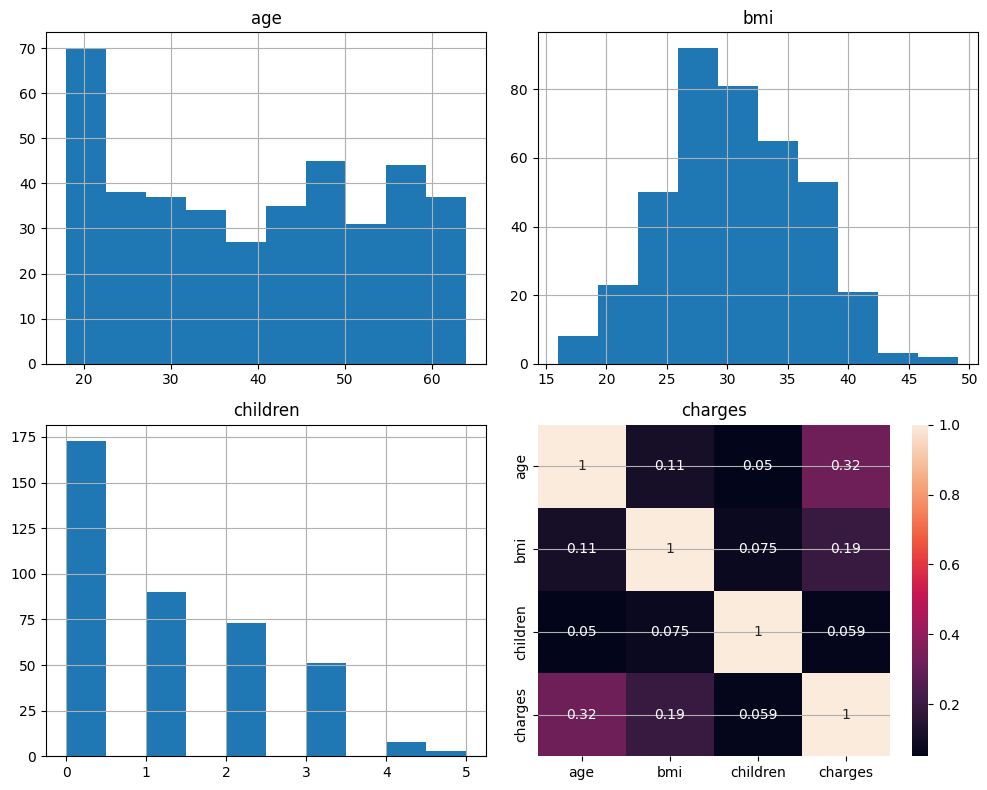

In [10]:
# A. Visualize numeric features (age, bmi, charges)
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Load the cleaned data (from previous step)
insurance_df = pd.read_csv('../data/insurance_cleaned.csv')

# Now run your existing visualization code...
insurance_df.hist(figsize=(10, 8))
plt.tight_layout()

# B. Compare charges vs. smoking
sns.boxplot(x='smoker', y='charges', data=insurance_df)

# C. Check correlations
sns.heatmap(insurance_df.corr(numeric_only=True), annot=True)